In [256]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import Sequential

In [252]:
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime
# For division
from __future__ import division

In [253]:
# List of Tech_stocks for analytics
tech_list = ['BAC']

# set up Start and End time for data fetch
end = datetime.now()
start = datetime(end.year-30,end.month,end.day)
print(start)
# Set DataFrame as the Stock Ticker
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)


1989-11-25 00:00:00


In [295]:
BAC.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1989-11-27,11.93750,11.68750,11.7500,11.90625,20603600.0,1.748579
1,1989-11-28,12.03125,11.81250,11.9375,12.00000,1227200.0,1.762347
2,1989-11-29,12.03125,11.93750,12.0000,11.93750,1821200.0,1.753168
3,1989-11-30,11.81250,11.59375,11.7500,11.71875,1375200.0,1.721041
4,1989-12-01,11.75000,11.53125,11.7500,11.59375,2703600.0,1.702685


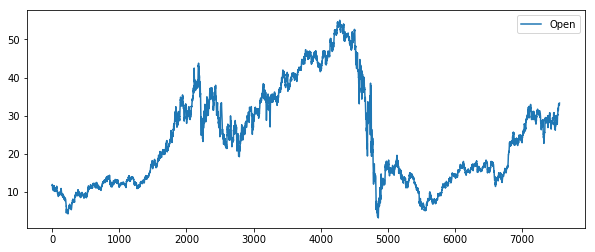

In [296]:
BAC['Open'].plot(legend = True, figsize = (10,4))
plt.show()

In [274]:
BAC.reset_index(level=0, inplace=True)

In [275]:
BAC.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [284]:
high_prices = BAC.loc[:,'High'].as_matrix()
low_prices = BAC.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

/Users/adityapatel/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/adityapatel/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [214]:
train_data = mid_prices[:5000]
test_data = mid_prices[5000:]

In [216]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [218]:
EMA = 0.0
gamma = 0.1
for ti in range(4200):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [219]:
window_size =20
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = BAC.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.76865


In [340]:
plt.figure(figsize = (18,9))
plt.plot(range(BAC.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')

plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)


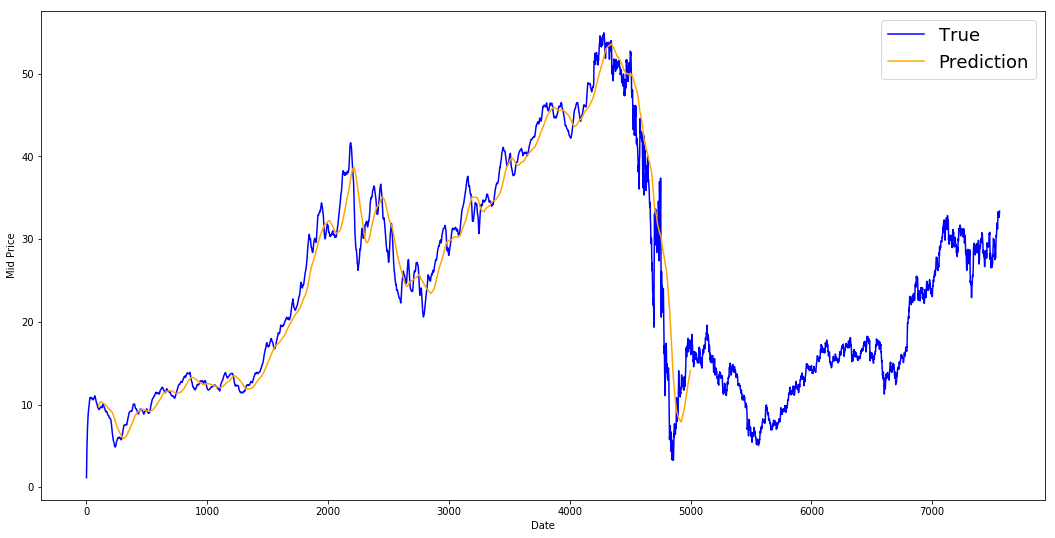

In [341]:
plt.show()

In [342]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = BAC.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 4.13117


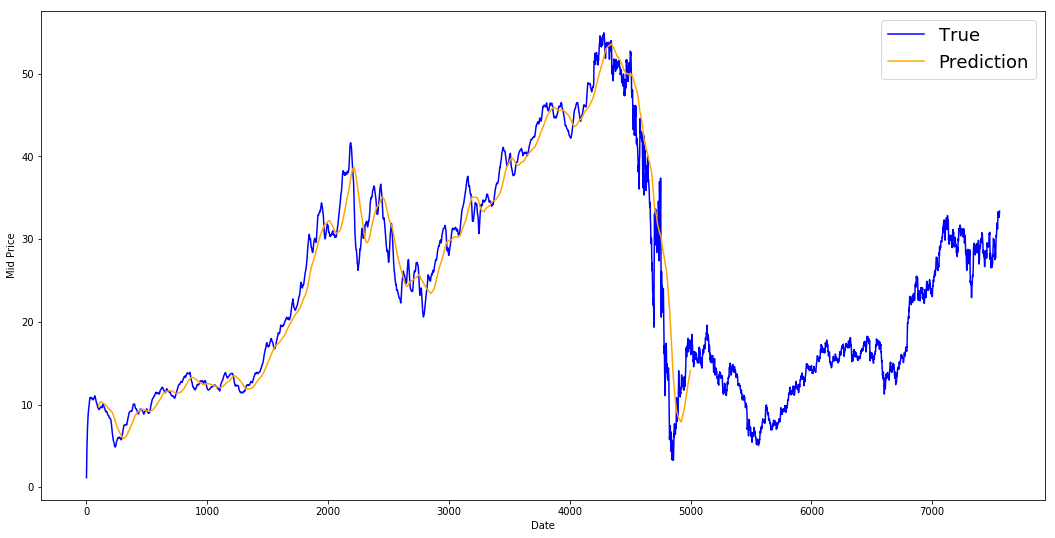

In [343]:
plt.figure(figsize = (18,9))
plt.plot(range(BAC.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')

plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()


In [344]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.11264


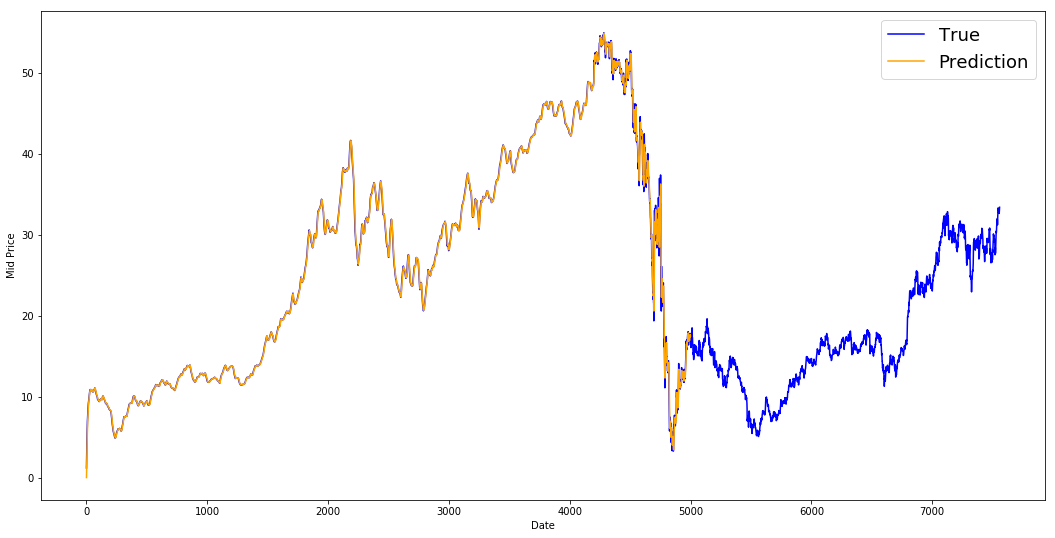

In [345]:
plt.figure(figsize = (18,9))
plt.plot(range(BAC.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')

plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [363]:
look_back = 40
forward_days = 15
num_periods = 20

In [364]:
df = pd.DataFrame(BAC['Date'])
df = df.drop(df.index[1])
df.size
df["mid_prices"] = mid_prices

In [366]:
array = pd.DataFrame(df.mid_prices)
array[:5]

,mid_prices
0,11.812500
2,11.921875
3,11.984375
4,11.703125
5,11.640625


In [367]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
array = scl.fit_transform(array)
array[:5]

array([[0.16534405],
       [0.16746105],
       [0.16867077],
       [0.16322704],
       [0.16201733]])

In [369]:
df.mid_prices = array
df.head()

,Date,mid_prices
0,628128000000000000,0.165344
2,628300800000000000,0.167461
3,628387200000000000,0.168671
4,628473600000000000,0.163227
5,628732800000000000,0.162017


In [370]:
#split data into Train and Test

division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [371]:
#Get the data and splits in input X and output Y, by spliting in 'n' past days as input X and 'm' coming days as Y.
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [372]:
X_test,y_test = processData(array_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [375]:
N_FirstLayer = 128
N_SecondLayer = 64
EPOCHS = 4
#Build the model
model = Sequential()
model.add(LSTM(N_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(N_SecondLayer,input_shape=(N_FirstLayer,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

Train on 5764 samples, validate on 1441 samples
Epoch 1/4
 - 635s - loss: 0.0021 - val_loss: 0.0019
Epoch 2/4
 - 246s - loss: 0.0011 - val_loss: 7.8867e-04
Epoch 3/4
 - 235s - loss: 0.0010 - val_loss: 7.8310e-04
Epoch 4/4
 - 260s - loss: 9.2957e-04 - val_loss: 0.0014


In [377]:
#Saving the model
file_name = 'LSTM_{}_FD{}_E{}_F{}_S{}.h5'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)
model.save(file_name)
print("Saved model `{}` to disk".format(file_name))

Saved model `LSTM_40_FD15_E4_F128_S64.h5` to disk


In [378]:
Xt = model.predict(X_test)

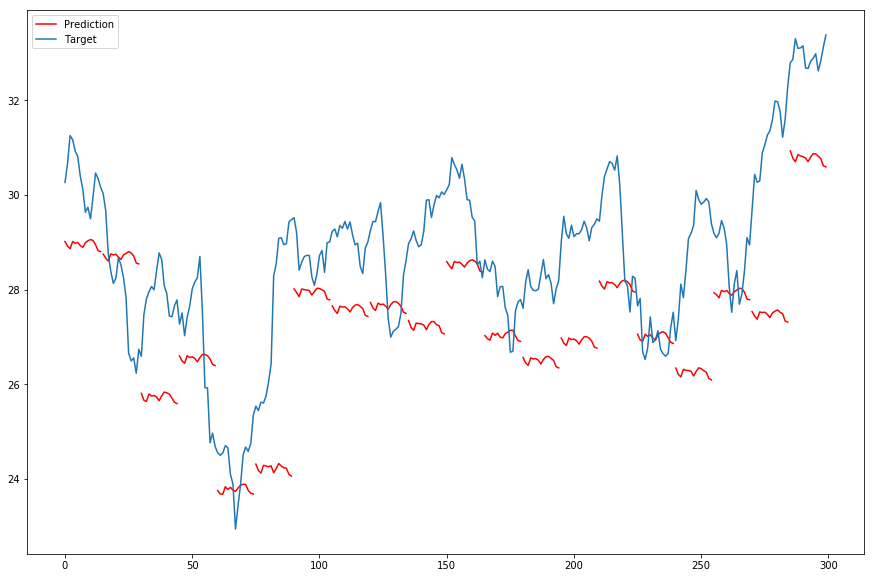

In [379]:
plt.figure(figsize = (15,10))

for i in range(0,len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
    
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
    
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()